# 📊 Unemployment Analysis with Python

Import required libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [38]:
data = pd.read_csv(r"C:\Users\victus\OneDrive\Desktop\flower\Unemployment in India.csv")
data



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean column names

In [39]:
data.columns = data.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Show cleaned columns
print(data.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_%',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_%', 'Area'],
      dtype='object')


Convert Date column to datetime

In [40]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

Basic info


In [41]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Region                                 740 non-null    object        
 1   Date                                   740 non-null    datetime64[ns]
 2   Frequency                              740 non-null    object        
 3   Estimated_Unemployment_Rate_%          740 non-null    float64       
 4   Estimated_Employed                     740 non-null    float64       
 5   Estimated_Labour_Participation_Rate_%  740 non-null    float64       
 6   Area                                   740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None
           Region       Date Frequency  Estimated_Unemployment_Rate_%  \
0  Andhra Pradesh 2019-05-31   Monthly                           3.65  

Unemployment Rate Distribution

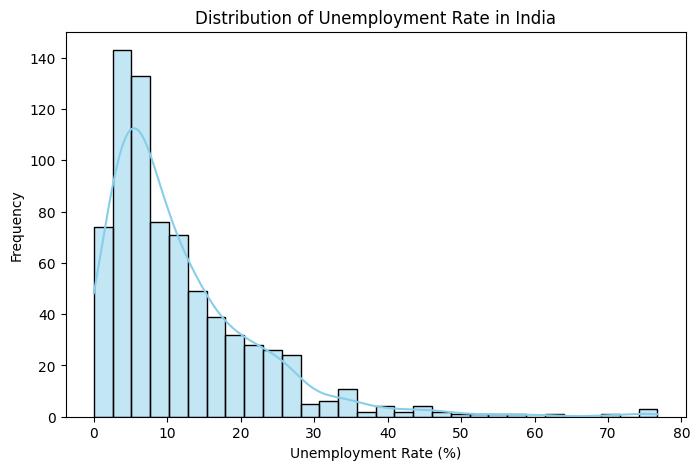

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data['Estimated_Unemployment_Rate_%'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Unemployment Rate in India")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

Trend over time (India overall average)

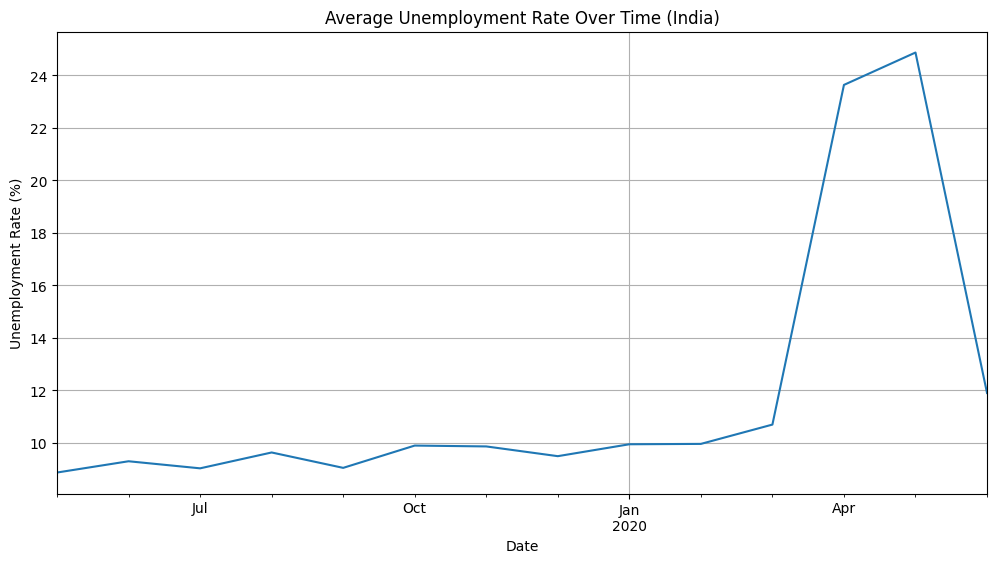

In [43]:
plt.figure(figsize=(12,6))
data.groupby('Date')['Estimated_Unemployment_Rate_%'].mean().plot()
plt.title("Average Unemployment Rate Over Time (India)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

Unemployment by Region


C:\Users\victus\AppData\Local\Temp\ipykernel_18456\3273043628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")


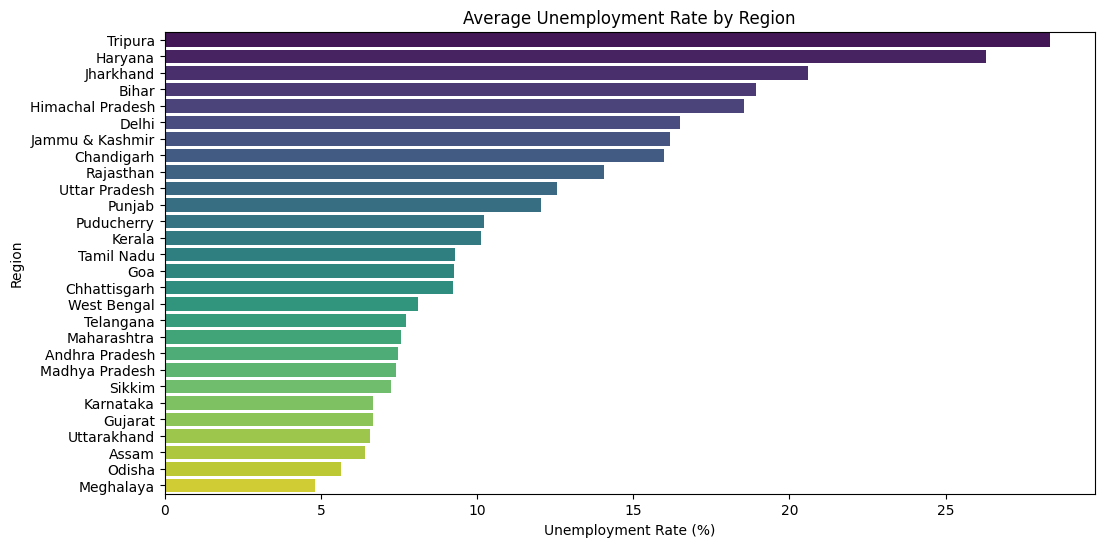

In [44]:
plt.figure(figsize=(12,6))
region_avg = data.groupby('Region')['Estimated_Unemployment_Rate_%'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()

Rural vs Urban Analysis

C:\Users\victus\AppData\Local\Temp\ipykernel_18456\3966881941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area', y='Estimated_Unemployment_Rate_%', data=data, palette="Set2")


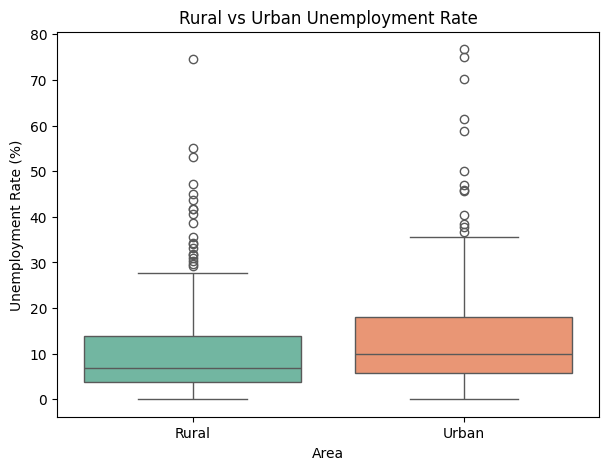

In [45]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Area', y='Estimated_Unemployment_Rate_%', data=data, palette="Set2")
plt.title("Rural vs Urban Unemployment Rate")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()

"""
📊 Insights:
- The unemployment rate shows fluctuations across different months, with visible spikes during Covid-19.
- Certain states/regions have consistently higher unemployment compared to others.
- Rural areas generally show different unemployment distributions compared to urban areas.
- Policymakers can use these insights to design region-specific job creation strategies.
"""